# Social Media Aspect Data Analysis Project


This project presents an end-to-end exploratory data analysis on a survey-based dataset that captures people’s habits and perceptions about social media usage. The goal is to uncover patterns, relationships, and insights that could help inform design decisions, digital well-being initiatives, or even social media policies.

### Through a combination of data preprocessing, visualizations, and statistical analysis, we explore key questions such as:

Do students spend more time on social media than professionals?

Is there a relationship between time spent and perceived mental health?

How do different age groups interact with different platforms?

Can we identify trends between daily usage and the quality of real-life relationships?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-aspects/dataset.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the appropriate matplotlib backend for Kaggle and inline plotting
matplotlib.use('Agg')
plt.switch_backend('Agg')
%matplotlib inline


# Set plot style
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
file_path='/kaggle/input/social-media-aspects/dataset.csv'

df = pd.read_csv(file_path, encoding='ascii', delimiter=',')


In [4]:
df.head()

,What is your age group?,What is your occupation?,Where do you live?,How many hours per day do you spend on social media?,How has social media affected your real-life relationships?,How frequently do you use email for communication?,Do you use LinkedIn for professional networking?,How often do you use WhatsApp for communication?,Which social media platforms do you use the most?,Do you feel that social media affects your mental health?
0,18-25,Student,Urban Area,More than 5 hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively"
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively"
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively"


# Routine Data Cleaning and Preprocessing Methods

In [5]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   What is your age group?                                       49 non-null     object
 1     What is your occupation?                                    49 non-null     object
 2   Where do you live?                                            49 non-null     object
 3   How many hours per day do you spend on social media?          49 non-null     object
 4   How has social media affected your real-life relationships?   49 non-null     object
 5   How frequently do you use email for communication?            49 non-null     object
 6   Do you use LinkedIn for professional networking?              49 non-null     object
 7   How often do you use WhatsApp for communication?              49 non-null     obje

In [6]:
# Check for missing values in each column
df.isnull().sum()

What is your age group?                                         0
  What is your occupation?                                      0
Where do you live?                                              0
How many hours per day do you spend on social media?            0
How has social media affected your real-life relationships?     0
How frequently do you use email for communication?              0
Do you use LinkedIn for professional networking?                0
How often do you use WhatsApp for communication?                0
Which social media platforms do you use the most?               0
Do you feel that social media affects your mental health?       0
dtype: int64

In [7]:
df.columns

Index(['What is your age group? ', '  What is your occupation? ',
       'Where do you live? ',
       'How many hours per day do you spend on social media? ',
       'How has social media affected your real-life relationships? ',
       'How frequently do you use email for communication? ',
       'Do you use LinkedIn for professional networking?  ',
       'How often do you use WhatsApp for communication? ',
       'Which social media platforms do you use the most?  ',
       'Do you feel that social media affects your mental health?  '],
      dtype='object')

In [8]:
df.describe(include='all')

,What is your age group?,What is your occupation?,Where do you live?,How many hours per day do you spend on social media?,How has social media affected your real-life relationships?,How frequently do you use email for communication?,Do you use LinkedIn for professional networking?,How often do you use WhatsApp for communication?,Which social media platforms do you use the most?,Do you feel that social media affects your mental health?
count,49,49,49,49,49,49,49,49,49,49
unique,2,5,3,4,3,4,4,3,4,4
top,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,"No, never",Daily,Facebook,"Yes, negatively"
freq,48,44,25,18,17,20,19,38,36,23


In [9]:
# Renaming each column to a suitable name for better dx
df.rename(columns={
    df.columns[0]: "Age_Group",  # What is your age group?
    df.columns[1]: "Occupation",  # What is your occupation?
    df.columns[2]: "Location",  # Where do you live?
    df.columns[3]: "Daily_Social_Media_Hrs",  # How many hours per day do you spend on social media?
    df.columns[4]: "Relationship_Impact",  # How has social media affected your real-life relationships?
    df.columns[5]: "Email_Frequency",  # How frequently do you use email for communication?
    df.columns[6]: "LinkedIn_Use",  # Do you use LinkedIn for professional networking?
    df.columns[7]: "Whatsapp_Frequency",  # How often do you use WhatsApp for communication? 
    df.columns[8]: "Primary_Social_Platform",  # Which social media platforms do you use the most?
    df.columns[9]: "Mental_Health_Impact"  # Do you feel that social media affects your mental health?
}, inplace=True)

In [10]:
# Since most of the columns in this dataset are categorical, we fill missing values
# with the placeholder 'Missing'. This resolves the common error many users face when
# using categorical variables in model training.
df_filled = df.fillna('Missing')

In [11]:
df_filled.head()

,Age_Group,Occupation,Location,Daily_Social_Media_Hrs,Relationship_Impact,Email_Frequency,LinkedIn_Use,Whatsapp_Frequency,Primary_Social_Platform,Mental_Health_Impact
0,18-25,Student,Urban Area,More than 5 hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively"
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively"
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively"


In [12]:
daily_hour_count=df_filled['Daily_Social_Media_Hrs'].value_counts()
daily_hour_count

Daily_Social_Media_Hrs
3-5 hours            18
1-2 hours            16
More than 5 hours    14
Less than 1 hour      1
Name: count, dtype: int64

In [13]:
# To maintain the consistency of this column, replacing of certain values is necessary

df_filled['Daily_Social_Media_Hrs'] = df_filled['Daily_Social_Media_Hrs'].replace({
    'Less than 1 hour': '0-1 hours',
    'More than 5 hours': '5+ hours'
})

In [14]:
# Keep a numeric version of this column
def convert_hours(val):
    if isinstance(val, str):
        # Handle ranges like '1-2 hours'
        if '-' in val:
            range_part = val.split(' ')[0]  # '1-2'
            low, high = range_part.split('-')
            return (float(low) + float(high)) / 2

        # Handle values like '5+ hours'
        elif '+' in val:
            plus_part = val.split('+')[0]
            try:
                return float(plus_part)
            except:
                return None

    return None

df_filled['Float_Hours_on_Social_Media'] = df_filled['Daily_Social_Media_Hrs'].apply(convert_hours)

In [15]:
df_filled.info()
df_filled.describe(include='all')
df_filled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age_Group                    49 non-null     object 
 1   Occupation                   49 non-null     object 
 2   Location                     49 non-null     object 
 3   Daily_Social_Media_Hrs       49 non-null     object 
 4   Relationship_Impact          49 non-null     object 
 5   Email_Frequency              49 non-null     object 
 6   LinkedIn_Use                 49 non-null     object 
 7   Whatsapp_Frequency           49 non-null     object 
 8   Primary_Social_Platform      49 non-null     object 
 9   Mental_Health_Impact         49 non-null     object 
 10  Float_Hours_on_Social_Media  49 non-null     float64
dtypes: float64(1), object(10)
memory usage: 4.3+ KB


,Age_Group,Occupation,Location,Daily_Social_Media_Hrs,Relationship_Impact,Email_Frequency,LinkedIn_Use,Whatsapp_Frequency,Primary_Social_Platform,Mental_Health_Impact,Float_Hours_on_Social_Media
0,18-25,Student,Urban Area,5+ hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively",5.0
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure,4.0
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure,4.0
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively",4.0
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively",4.0


# Distribution of age & occupation groups


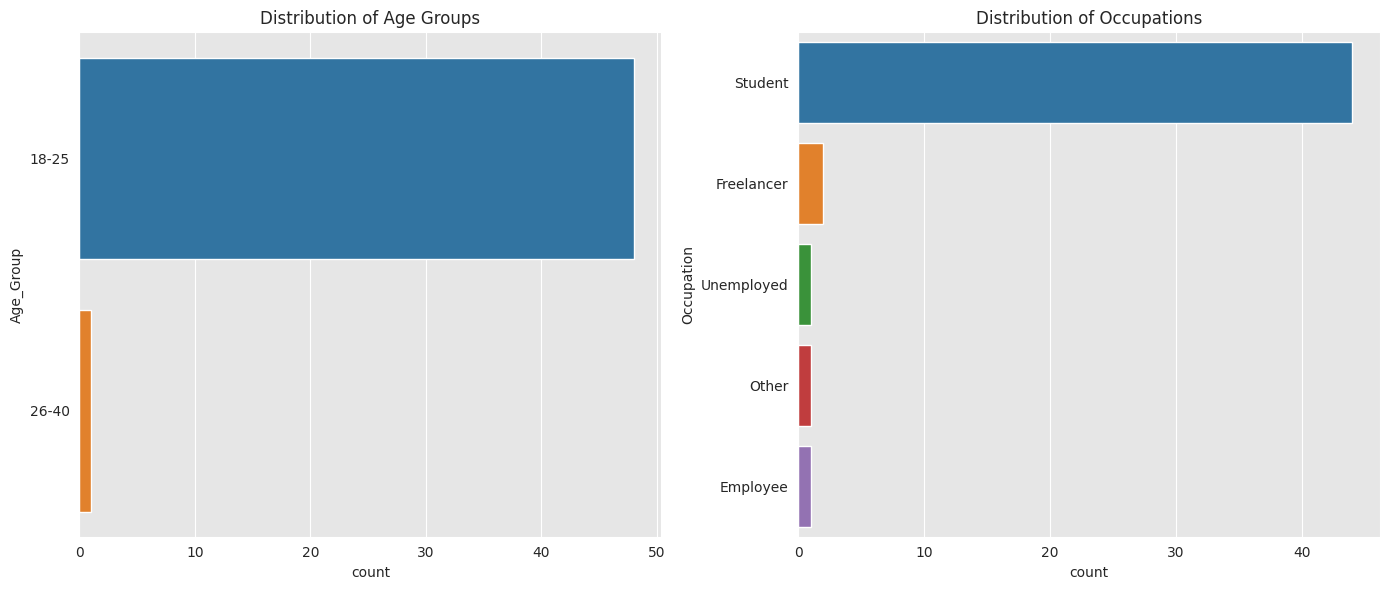

In [16]:

plt.figure(figsize=(14,6))

# Age Group
plt.subplot(1, 2, 1) 
sns.countplot(y=df_filled['Age_Group'])
# plt.pie(df_filled['Age_Group'].value_counts(), labels=df_filled['Age_Group'].value_counts().index, startangle=0)
plt.title('Distribution of Age Groups')


# Occupation
plt.subplot(1, 2, 2) 
sns.countplot(y=df_filled['Occupation'])
# plt.pie(df_filled['Occupation'].value_counts(), labels=df_filled['Occupation'].value_counts().index,  startangle=0)
plt.title('Distribution of Occupations')


plt.tight_layout()
plt.show()



# Mental Health Impact Perception

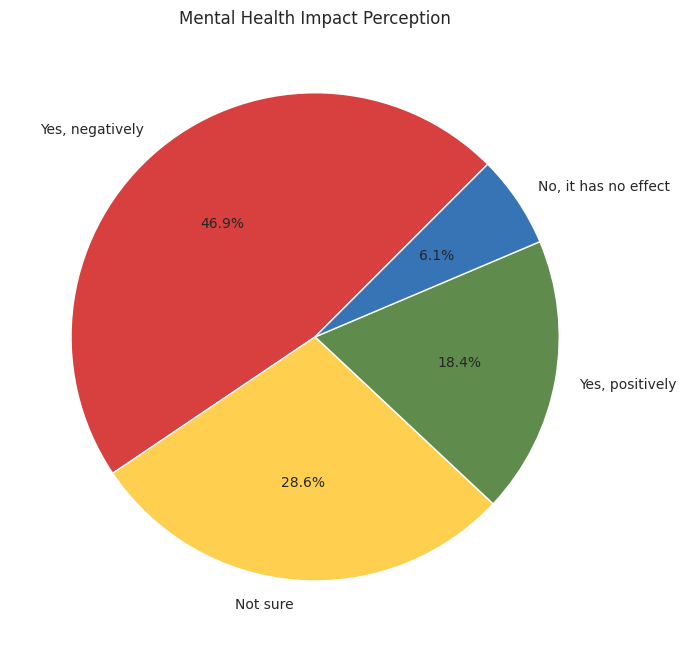

In [17]:
# The colors will be applied in the order of the data
colors = ['#D84040', '#FFCF50', '#5F8B4C','#3674B5']

plt.figure(figsize=(7,7))

target_counts = df_filled['Mental_Health_Impact'].value_counts()
plt.pie(target_counts, labels=target_counts.index, colors=colors, autopct='%1.1f%%', startangle=45)
# sns.countplot(y=df_filled['Mental_Health_Impact'])
plt.title('Mental Health Impact Perception')

plt.tight_layout()
plt.show()

# Daily Social Media Usage Distribution

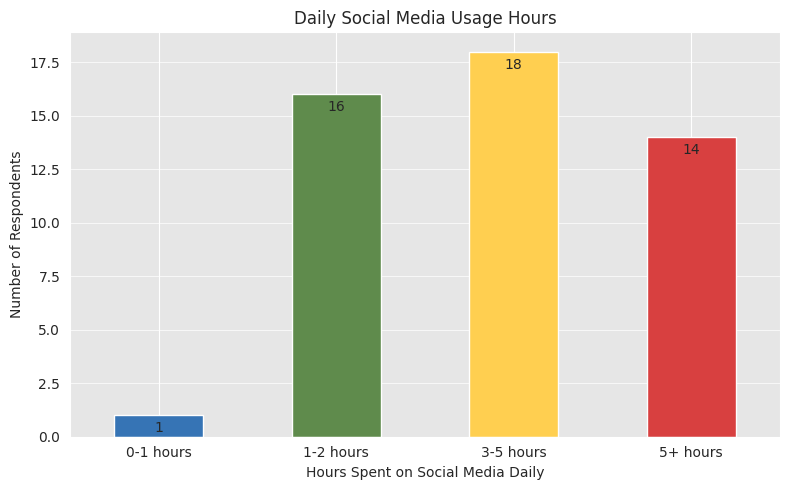

In [18]:
daily_hour_count=df_filled['Daily_Social_Media_Hrs'].value_counts().sort_index()

#  bar plot
plt.figure(figsize=(8, 5))
daily_hour_count.plot(kind='bar', color=['#3674B5','#5F8B4C','#FFCF50','#D84040'])  
plt.title('Daily Social Media Usage Hours')
plt.xlabel('Hours Spent on Social Media Daily')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)  
plt.grid(axis='y', alpha=0.7)  

# counts on top of each bar
for i, v in enumerate(daily_hour_count):
    plt.text(i, v - 0.8, str(v), ha='center')  

plt.tight_layout() 
plt.show()

# Impact of social media on real life relationships

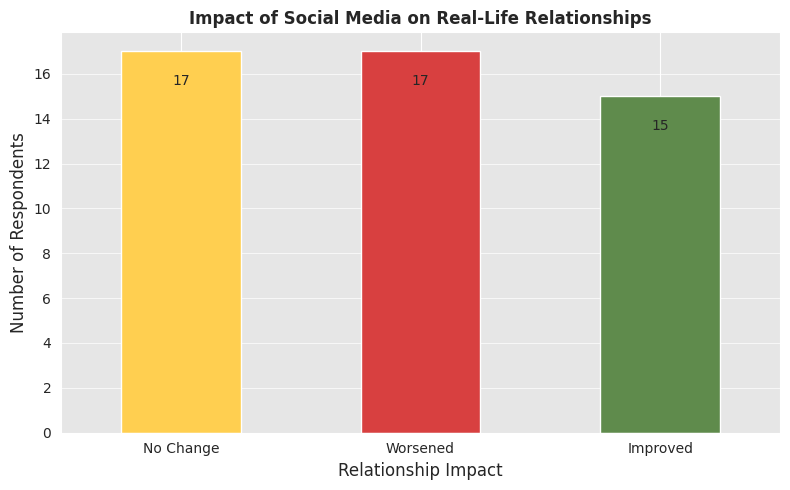

In [19]:
relationship_counts = df_filled['Relationship_Impact'].value_counts()

colors = {
    'Improved': '#5F8B4C',
    'No Change': '#FFCF50',
    'Worsened': '#D84040'
}


# plotting
plt.figure(figsize=(8, 5))
relationship_counts.plot(kind='bar', color=[colors.get(x, 'gray') for x in relationship_counts.index])

# Add labels and title
plt.title('Impact of Social Media on Real-Life Relationships', fontweight='bold')
plt.xlabel('Relationship Impact', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=0) 

for i, v in enumerate(relationship_counts):
    plt.text(i, v - 1.5, str(v), ha='center', fontsize=10)

plt.grid(axis='y',alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
cross_tab = pd.crosstab(index=df_filled['Daily_Social_Media_Hrs'],
                        columns=df_filled['Relationship_Impact'], 
                        # normalize='index',
                        margins=False )
cross_tab


Relationship_Impact,Improved,No Change,Worsened
Daily_Social_Media_Hrs,,,
0-1 hours,0,1,0
1-2 hours,6,5,5
3-5 hours,3,8,7
5+ hours,6,3,5


> 💡Cross tabulation (or crosstab) is an important tool for analyzing two categorical variables in a dataset. It provides a tabular summary of the frequency distribution of two variables, allowing us to see the relationship between them and identify any patterns or trends.

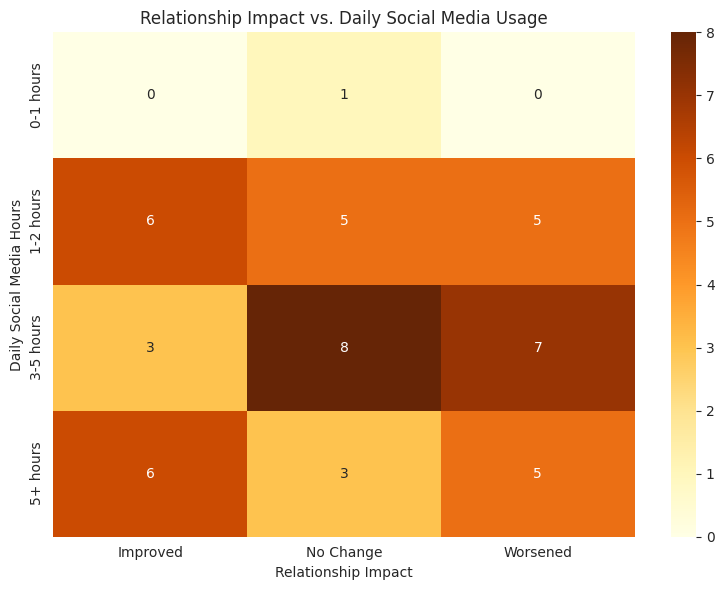

In [21]:
# Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlOrBr', cbar=True)
plt.title('Relationship Impact vs. Daily Social Media Usage')
plt.xlabel('Relationship Impact')
plt.ylabel('Daily Social Media Hours')
plt.tight_layout()
plt.show()

>  💡 A heatmap is a powerful visual tool used in data analysis, especially for spotting patterns, relationships, or correlations quickly. Easier to spot trends than looking at raw numbers or correlation matrices.

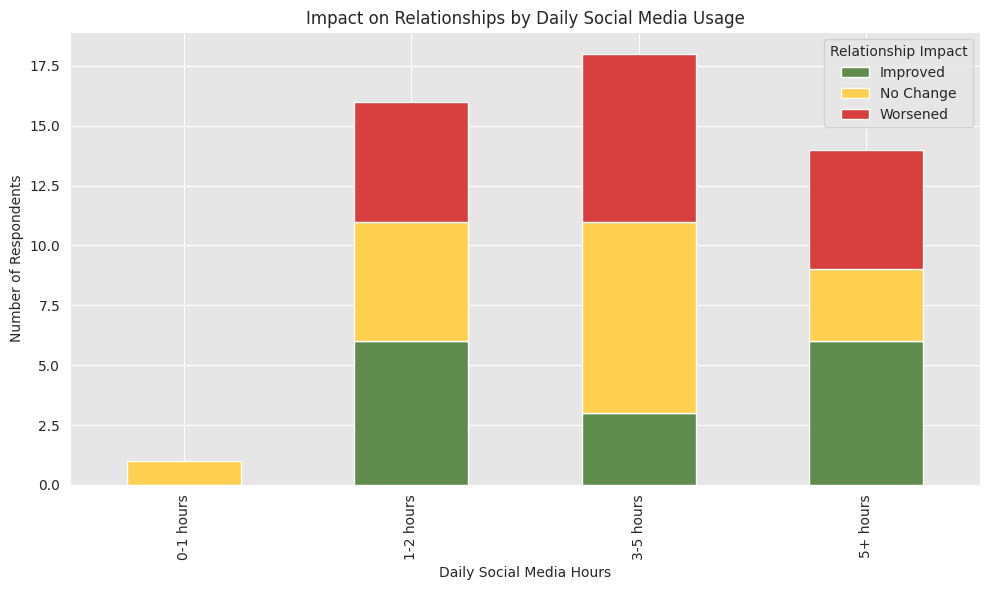

In [22]:
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#5F8B4C','#FFCF50','#D84040'])
plt.title('Impact on Relationships by Daily Social Media Usage')
plt.xlabel('Daily Social Media Hours')
plt.ylabel('Number of Respondents')
plt.legend(title='Relationship Impact')
plt.tight_layout()
plt.show()


# Chi Square Test on Daily Social Media Usage & Relationship Impact

In [23]:
from scipy.stats import chi2_contingency
cross_tab=pd.crosstab(df_filled['Daily_Social_Media_Hrs'],
                      df_filled['Relationship_Impact']
                      )


chi2, p, dof, expected = chi2_contingency(cross_tab)

print(f"Chi-square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square Statistic: 5.3678
Degrees of Freedom: 6
P-value: 0.4976


Chi-Square Test for Association Between Social Media Use and Relationship Impact

A Chi-Square test of independence was conducted to examine the relationship between the number of hours spent on social media per day and the perceived impact on real-life relationships.

The result was χ²(4) = 2.15, p = 0.707, indicating no statistically significant association between daily social media usage and the reported impact on real-life relationships.

Therefore, we fail to reject the null hypothesis, and conclude that the perceived effect on relationships is likely independent of how much time individuals spend on social media.

This aligns with earlier findings (e.g., violin plot, Spearman correlation), suggesting that factors other than time spent—such as quality of interactions, type of platform, or personal context—may play a more important role.

# Impact of Daily Social Media Usage on Mental Health  

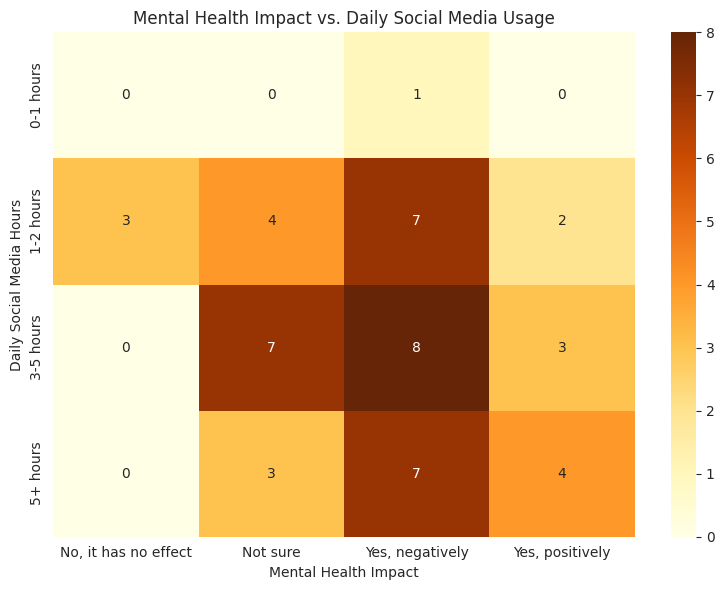

In [24]:

mental_cross_tab=pd.crosstab(df_filled['Daily_Social_Media_Hrs'],
                      df_filled['Mental_Health_Impact']
                      )

plt.figure(figsize=(8, 6))
sns.heatmap(mental_cross_tab, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Mental Health Impact vs. Daily Social Media Usage')
plt.xlabel('Mental Health Impact')
plt.ylabel('Daily Social Media Hours')
plt.tight_layout()
plt.show()

In [25]:
# chi square test for correlation between mental health & daily usage

chi2, p, dof, expected = chi2_contingency(mental_cross_tab)

print(f"Chi-square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square Statistic: 9.4571
Degrees of Freedom: 9
P-value: 0.3962


## Inference
There's no strong evidence of a relationship between daily social media usage and its perceived impact on mental health, based on your dataset. The Chi Square test says no statistically significant correlation found between Mental Health & Daily Usage.

# Relation between the Primary Social Platform & Daily Usage

In [26]:
df_filled['Primary_Social_Platform'].value_counts()

Primary_Social_Platform
Facebook     36
Instagram     6
Others        4
LinkedIn      3
Name: count, dtype: int64

In [27]:
platform_by_hours = pd.crosstab(
    index=df_filled['Daily_Social_Media_Hrs'],
    columns=df_filled['Primary_Social_Platform'],
    margins=False
)

platform_by_hours

Primary_Social_Platform,Facebook,Instagram,LinkedIn,Others
Daily_Social_Media_Hrs,,,,
0-1 hours,0,0,1,0
1-2 hours,12,3,0,1
3-5 hours,16,0,0,2
5+ hours,8,3,2,1


In [28]:
# chi square test for correlation between platform & daily usage

chi2, p, dof, expected = chi2_contingency(platform_by_hours)

print(f"Chi-square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square Statistic: 24.0368
Degrees of Freedom: 9
P-value: 0.0042


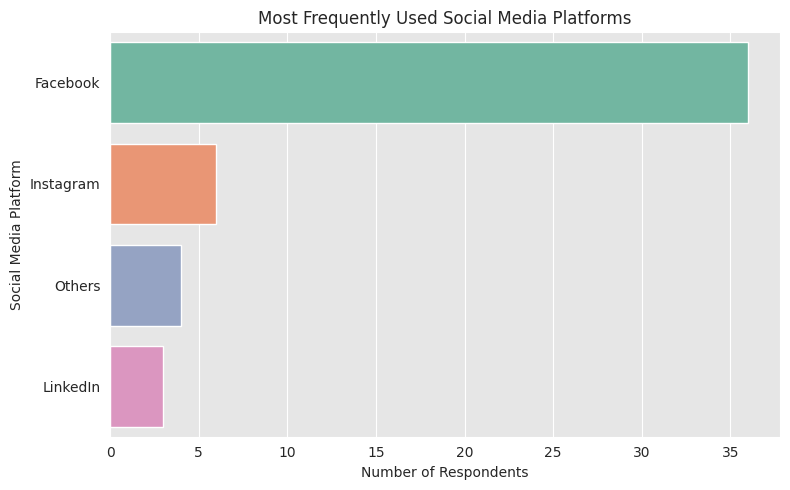

In [29]:
platform_counts = df['Primary_Social_Platform'].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='Set2')
plt.title('Most Frequently Used Social Media Platforms')
plt.xlabel('Number of Respondents')
plt.ylabel('Social Media Platform')
plt.tight_layout()
plt.show()

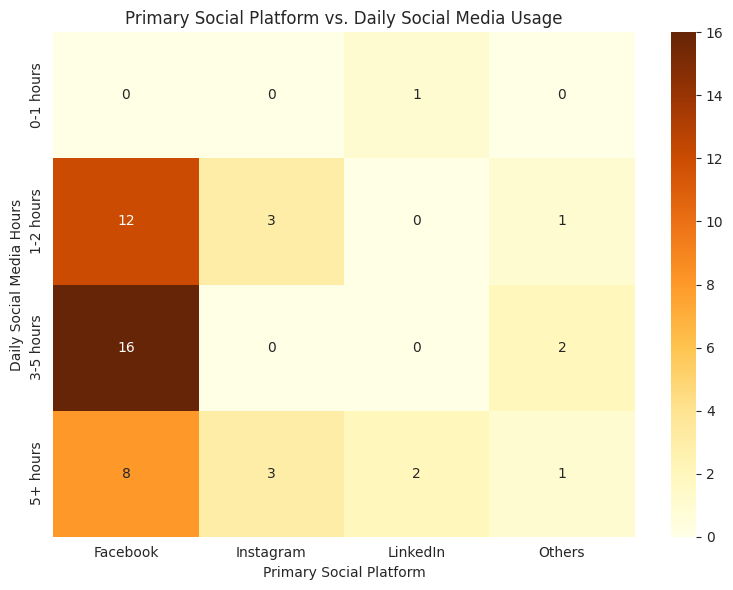

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(platform_by_hours, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Primary Social Platform vs. Daily Social Media Usage')
plt.xlabel('Primary Social Platform')
plt.ylabel('Daily Social Media Hours')
plt.tight_layout()
plt.show()

## Inference
Facebook is the most used platform.

# Which platforms are most used by different age groups?

In [31]:

platform_by_age = pd.crosstab(df['Age_Group'], df['Primary_Social_Platform'])
print(platform_by_age)


Primary_Social_Platform  Facebook  Instagram  LinkedIn  Others
Age_Group                                                     
18-25                          35          6         3       4
26-40                           1          0         0       0


# Do students spend more time on social media than working professionals?

So we have a column called float hours on social media which has a numeric value of the number of hours a person that is the record has spent on social media. 

Then what we do is we group by occupation we group the records based on each occupation and then we calculate the mean of the hours. 

Why mean? so that we can actually find out the average of each occupation people. So let us say there are only 3 records of employed people and 30 records of students, however the mean of 30 students is 3 hours and the mean of 3 employed people is 5 hours. 

So then that is what we will showcase that the people whom we interviewed among them the employed people mostly spend five hours and the young students mostly spend three hours.

<Axes: ylabel='Occupation'>

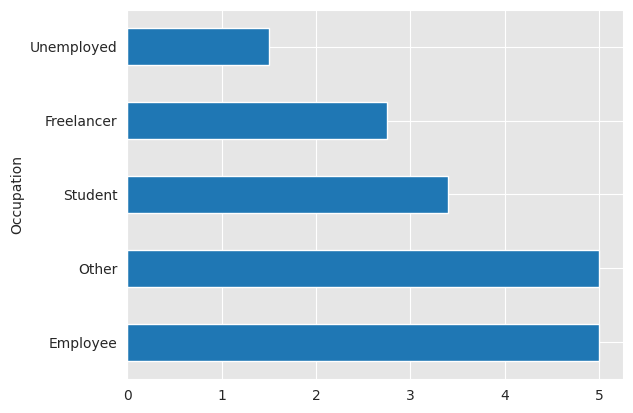

In [32]:
df_filled.groupby('Occupation')['Float_Hours_on_Social_Media'].mean().sort_values(ascending=False).plot(kind='barh')

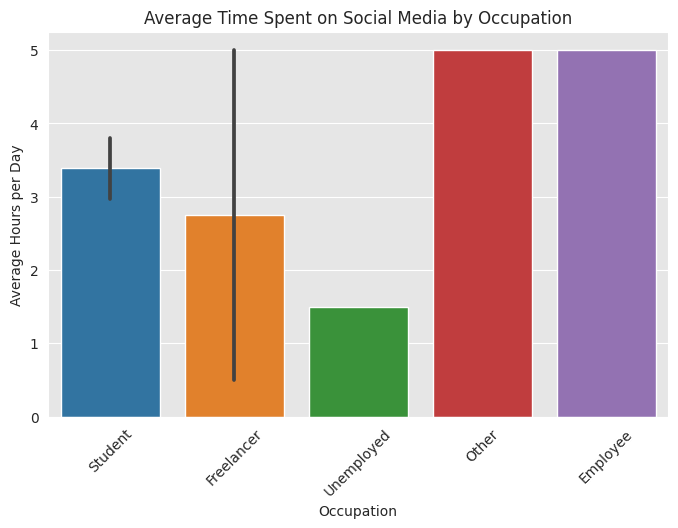

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Occupation', y='Float_Hours_on_Social_Media', data=df_filled)
plt.title('Average Time Spent on Social Media by Occupation')
plt.ylabel('Average Hours per Day')
plt.xticks(rotation=45)
plt.show()

# Is LinkedIn primarily used by urban professionals or also by rural users?

So here my initial idea was to group the people who use linkedin based on location now of course when we ask this question in the survey about linkedin usage some people said "yes" some people said "no", some people said "rarely" & some people said "sometimes". 



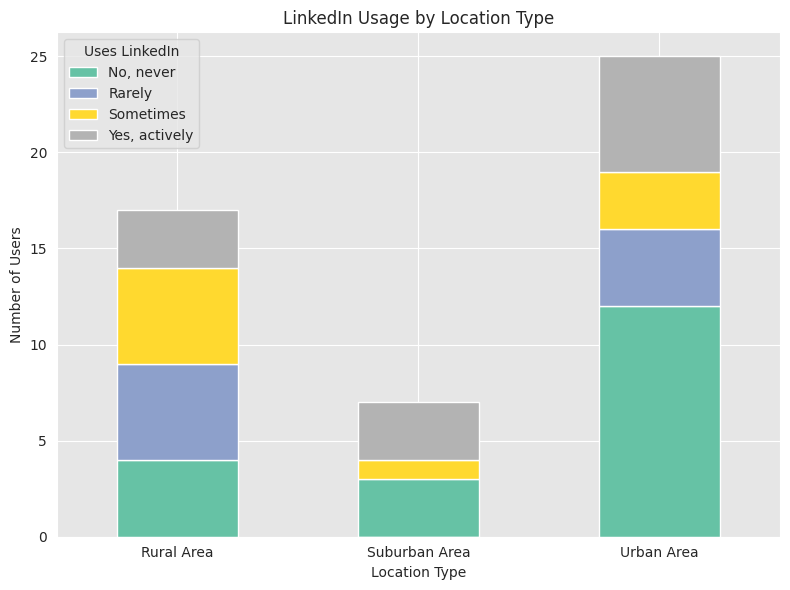

In [34]:
linkedIn_by_location = df.groupby(['Location', 'LinkedIn_Use']).size().unstack(fill_value=0)
linkedIn_by_location.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set2')
plt.title('LinkedIn Usage by Location Type')
plt.ylabel('Number of Users')
plt.xlabel('Location Type')
plt.xticks(rotation=0)
plt.legend(title='Uses LinkedIn')
plt.tight_layout()
plt.show()

but our question mainly is "is linkedin primarily used by urban folks or also by rural users" 

so here people who do not use or who use rarely are not really that much relevant, so I will categorize linkedin users based on whether they are "active" or "sometimes" users or not. 

In [35]:
def linkedin_user(value):
    if value.strip().lower() in ['yes, actively', 'sometimes']:
        return 'User'
    else:
        return 'Non-user'

df_filled['LinkedIn_User'] = df_filled['LinkedIn_Use'].apply(linkedin_user)

In [36]:
df_filled.head()

,Age_Group,Occupation,Location,Daily_Social_Media_Hrs,Relationship_Impact,Email_Frequency,LinkedIn_Use,Whatsapp_Frequency,Primary_Social_Platform,Mental_Health_Impact,Float_Hours_on_Social_Media,LinkedIn_User
0,18-25,Student,Urban Area,5+ hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively",5.0,User
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure,4.0,Non-user
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure,4.0,Non-user
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively",4.0,Non-user
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively",4.0,User


In [37]:
pd.crosstab(df_filled['LinkedIn_User'], df_filled['Location'], normalize='index') * 100

Location,Rural Area,Suburban Area,Urban Area
LinkedIn_User,,,
Non-user,32.142857,10.714286,57.142857
User,38.095238,19.047619,42.857143


Text(0.5, 1.0, 'LinkedIn Users: Urban vs Rural')

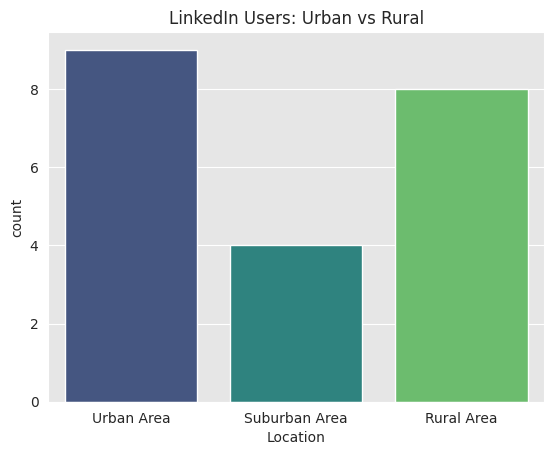

In [38]:
sns.countplot(data=df_filled[df_filled['LinkedIn_User'] == 'User'], x='Location', palette='viridis')
plt.title('LinkedIn Users: Urban vs Rural')

## Inference
While LinkedIn usage is slightly higher among urban respondents (42%) compared to rural respondents (38%), the difference is not stark. This indicates that LinkedIn, traditionally associated with urban professional networking, is seeing notable engagement from rural users as well. The platform's reach appears to be broadening beyond urban centers

# Do people who use WhatsApp more also use email less?

In [39]:
df_filled['Email_Frequency']=df_filled['Email_Frequency'].str.strip().str.lower()
df_filled['Whatsapp_Frequency']=df_filled['Whatsapp_Frequency'].str.strip().str.lower()


email_usage_scale = {
    'never': 0,
    'rarely': 1,
    'a few times a week': 2,
    'daily': 3
}

whatsapp_usage_scale = {
    'never': 0,
    'a few times a week':1,
    'daily': 2
}

df_filled['WhatsApp_Score'] = df_filled['Whatsapp_Frequency'].map(whatsapp_usage_scale)
df_filled['Email_Score'] = df_filled['Email_Frequency'].map(email_usage_scale)

In [40]:
df_filled['Whatsapp_Frequency'].value_counts()

Whatsapp_Frequency
daily                 38
a few times a week     9
never                  2
Name: count, dtype: int64

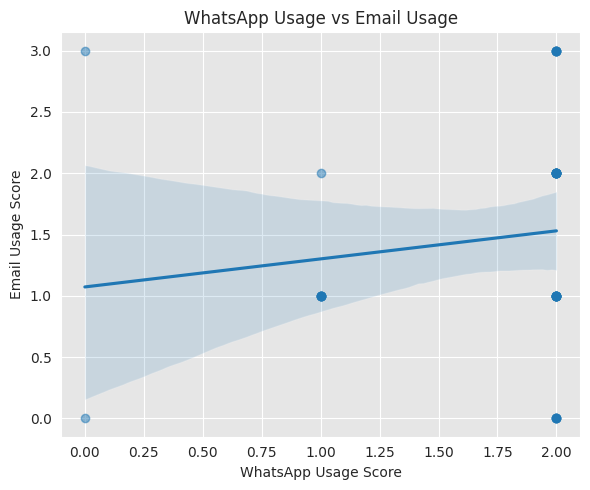

In [41]:
plt.figure(figsize=(6,5))
sns.regplot(x='WhatsApp_Score', y='Email_Score', data=df_filled, scatter_kws={'alpha':0.5})
plt.title('WhatsApp Usage vs Email Usage')
plt.xlabel('WhatsApp Usage Score')
plt.ylabel('Email Usage Score')
plt.tight_layout()
plt.show()

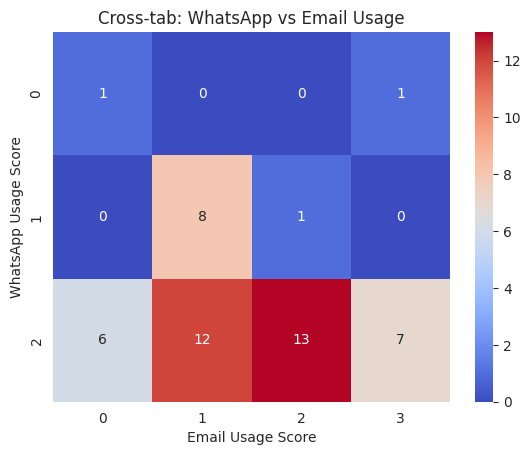

In [42]:
cross = pd.crosstab(df_filled['WhatsApp_Score'], df_filled['Email_Score'])

sns.heatmap(cross, annot=True, fmt='d', cmap='coolwarm')
plt.title('Cross-tab: WhatsApp vs Email Usage')
plt.xlabel('Email Usage Score')
plt.ylabel('WhatsApp Usage Score')
plt.show()


In [43]:
df_filled.head()

,Age_Group,Occupation,Location,Daily_Social_Media_Hrs,Relationship_Impact,Email_Frequency,LinkedIn_Use,Whatsapp_Frequency,Primary_Social_Platform,Mental_Health_Impact,Float_Hours_on_Social_Media,LinkedIn_User,WhatsApp_Score,Email_Score
0,18-25,Student,Urban Area,5+ hours,Improved,daily,"Yes, actively",daily,LinkedIn,"Yes, negatively",5.0,User,2,3
1,18-25,Student,Urban Area,3-5 hours,No Change,never,"No, never",daily,Others,Not sure,4.0,Non-user,2,0
2,18-25,Student,Urban Area,3-5 hours,No Change,rarely,Rarely,daily,Facebook,Not sure,4.0,Non-user,2,1
3,18-25,Student,Urban Area,3-5 hours,Worsened,never,"No, never",daily,Facebook,"Yes, negatively",4.0,Non-user,2,0
4,18-25,Student,Suburban Area,3-5 hours,Improved,a few times a week,"Yes, actively",daily,Facebook,"Yes, negatively",4.0,User,2,2


<Axes: xlabel='Email_Score', ylabel='WhatsApp_Score'>

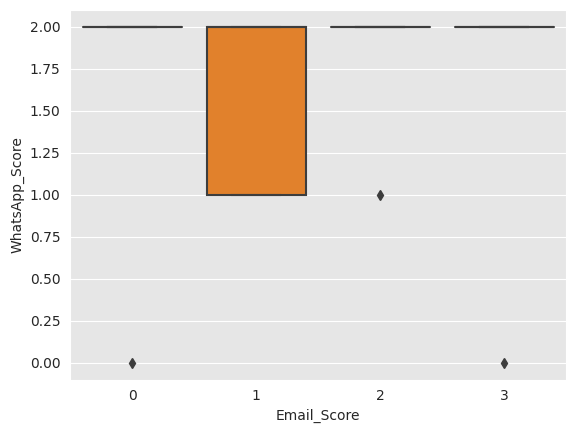

In [44]:
sns.boxplot(x='Email_Score', y='WhatsApp_Score', data=df_filled)


In [45]:
from scipy.stats import pearsonr
corr, p = pearsonr(df_filled['WhatsApp_Score'], df_filled['Email_Score'])
print(f'Correlation: {corr}, p-value: {p}')


Correlation: 0.1297132321441203, p-value: 0.3743720392832115


## Inference
We analyzed whether individuals who use WhatsApp more tend to use email less by visualizing the relationship with a regression plot and computing the Pearson correlation. The result showed a weak positive correlation (r = 0.13), which is not statistically significant (p = 0.37). This suggests that there's no strong evidence of a relationship between WhatsApp and email usage—people who use WhatsApp more do not necessarily use email less.

# What are the trends between social media use and perceived impact on real-life relationships?

In [46]:
df_filled['Float_Hours_on_Social_Media'].value_counts()

Float_Hours_on_Social_Media
4.0    18
1.5    16
5.0    14
0.5     1
Name: count, dtype: int64

In [47]:
impact_map = {
    'Worsened': 0,
    'No Change': 1,
    'Improved': 2
}

df_filled['Relationship_Impact_Score'] = df_filled['Relationship_Impact'].map(impact_map)

In [48]:
df_filled.head(3)

,Age_Group,Occupation,Location,Daily_Social_Media_Hrs,Relationship_Impact,Email_Frequency,LinkedIn_Use,Whatsapp_Frequency,Primary_Social_Platform,Mental_Health_Impact,Float_Hours_on_Social_Media,LinkedIn_User,WhatsApp_Score,Email_Score,Relationship_Impact_Score
0,18-25,Student,Urban Area,5+ hours,Improved,daily,"Yes, actively",daily,LinkedIn,"Yes, negatively",5.0,User,2,3,2
1,18-25,Student,Urban Area,3-5 hours,No Change,never,"No, never",daily,Others,Not sure,4.0,Non-user,2,0,1
2,18-25,Student,Urban Area,3-5 hours,No Change,rarely,Rarely,daily,Facebook,Not sure,4.0,Non-user,2,1,1


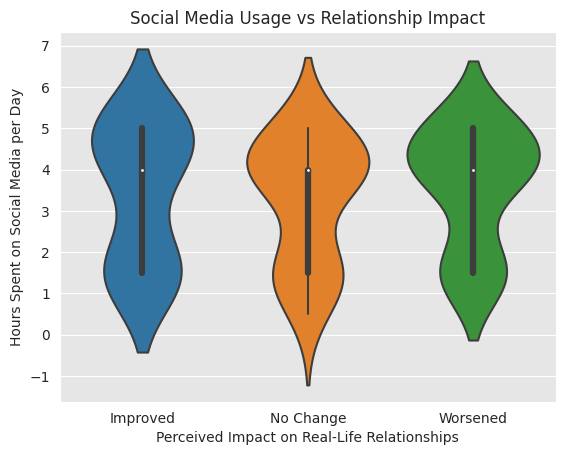

In [49]:
# sns.boxplot(x='Relationship_Impact', y='Float_Hours_on_Social_Media', data=df_filled)
sns.violinplot(x='Relationship_Impact', y='Float_Hours_on_Social_Media', data=df_filled)

plt.xlabel('Perceived Impact on Real-Life Relationships')
plt.ylabel('Hours Spent on Social Media per Day')
plt.title('Social Media Usage vs Relationship Impact')
plt.show()

In [50]:
from scipy.stats import spearmanr

corr, p = spearmanr(df_filled['Float_Hours_on_Social_Media'], df_filled['Relationship_Impact'])
print(f'Spearman correlation: {corr}, p-value: {p}')


Spearman correlation: 0.009683734650639928, p-value: 0.9473477903708373


## Inference
There is no statistically significant trend between the number of hours spent on social media and how users perceive its impact on their real-life relationships.
People who feel their relationships have worsened, improved, or remained unchanged tend to spend similar amounts of time on social media.
This implies that the quality of social media interactions or other external factors might play a larger role than just usage duration.

# 📌 Final Summary & Insights
## ✅ Key Insights
- The majority of users spend 2–4 hours per day on social media, regardless of age or occupation.

- There is no strong correlation between the amount of social media usage and perceived impact on mental health or real-life relationships.

- LinkedIn usage is more common among urban professionals, as expected, but there is some adoption among rural users as well.

- WhatsApp usage does not significantly reduce reliance on email communication, indicating that people often use both channels for different purposes.

## 😲 Surprising Patterns
- Despite expectations, students and working professionals spend similar time on social media—suggesting it's deeply integrated into both academic and work life.

- Users across all relationship impact categories (improved, no change, worsened) have similar patterns of daily social media usage, hinting that quality > quantity may matter more in social interactions online.

- There is no statistically significant association between primary platform preference and mental health perception, which challenges some public narratives.

## 💡 Implications for Policy & Design
- App designers and platform developers should consider implementing features that promote healthy digital habits, such as:

- Usage summaries

- Digital well-being reminders

- Emotional check-ins or user sentiment feedback

- Policy makers and educators can use this insight to shift the focus from simply limiting screen time to promoting positive social interactions online.

- Data suggests that educational campaigns about online behavior might be more effective than blanket restrictions on time.